## Plotting options 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import Greys9, inferno, viridis
from datashader.utils import export_image
from functools import partial
from numba import jit
import numba
background = "white"

In [2]:
img_map = partial(export_image, export_path="clifford_maps", background=background)

### Clifford attractors

\begin{equation}
x_{n +1} = \sin(a y_{n}) + c \cos(a x_{n})\\
y_{n +1} = \sin(b x_{n}) + d \cos(b y_{n})
\end{equation}

#### Function definition

Now, I'm also using `jit` as in https://anaconda.org/jbednar/clifford_attractor/notebook.
`Let's go fast!`

In [3]:
@jit
def clifford(a, b, c, d, x, y):
    return np.sin(a * y) + c * np.cos(a * x), np.sin(b * x) + d*np.cos(b * y)

In [4]:
n = 10000000
@jit
def trajectory(fn, a, b, c, d, x0=0, y0=0, n=n):
    x, y = np.zeros(n), np.zeros(n)
    x[0], y[0] = x0, y0
    for i in np.arange(n-1):
        x[i+1], y[i+1] = fn(a, b, c, d, x[i], y[i])
    return pd.DataFrame(dict(x=x,y=y))

### Domain

In [5]:
df = trajectory(clifford, -1.9,   -1.9,   -1.9,   -1.0, 0, 0)

Now, a set of suitable colormaps can be found in `colorcet` as follows.

In [6]:
from colorcet import palette
cmaps =  [palette[p][::-1] for p in ['bgy', 'bmw', 'bgyw', 'bmy','fire', 'gray', 'kbc', 'kgy']]
cmaps += [inferno[::-1], viridis[::-1]]

See http://holoviews.org/user_guide/Colormaps.html for more info. 

### Density `datashader`  plot 

In [7]:
cvs = ds.Canvas(plot_width = 400, plot_height = 400)
agg = cvs.points(df, 'x', 'y')
ds.transfer_functions.Image.border=0

I don't really like that much `Datashader's` default histogram equalization (even though looks good!), I would rather use a linear colormap since I can relate this to a more intuitive physical interpretation.

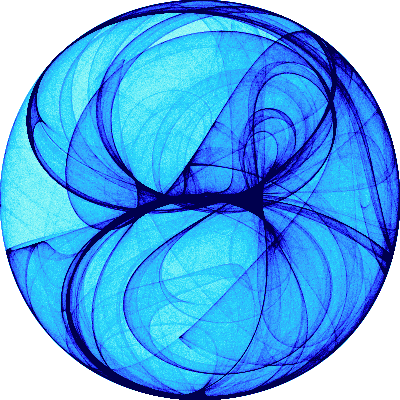

In [8]:
img = tf.shade(agg, cmap = cmaps[6], how='linear', span = [0, n/60000])
img_map(img,"attractorColor1")

### [De Jong attractors ](http://paulbourke.net/fractals/peterdejong/)

In [9]:
@jit
def dejong(a, b, c, d, x, y):
    return np.sin(a * y) - np.cos(b * x), \
           np.sin(c * x) - np.cos(d * y)

In [10]:
df = trajectory(dejong, -2.722,  2.574,  1.284,  1.043, 0, 0)

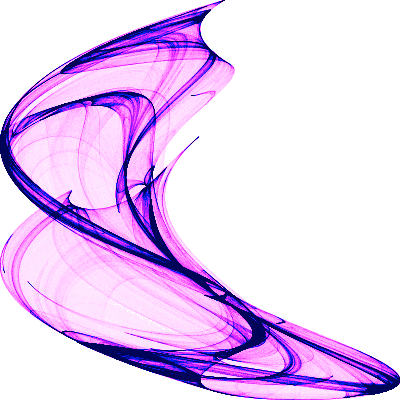

In [11]:
cvs = ds.Canvas(plot_width = 400, plot_height = 400)
agg = cvs.points(df, 'x', 'y')
img = tf.shade(agg, cmap = cmaps[1], how='linear', span = [0, n/30000])
img_map(img,"attractorJong")

In [12]:
@jit
def svensson(a, b, c, d, x, y):
    return d * np.sin(a * x) - np.sin(b * y), \
           c * np.cos(a * x) + np.cos(b * y)

In [13]:
df = trajectory(svensson, 1.40,   1.56,   1.40,  -6.56, 0.1, 0.1)

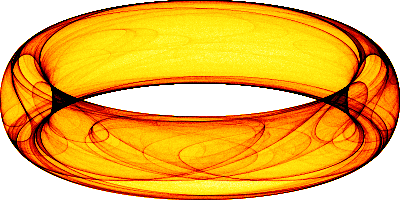

In [14]:
cvs = ds.Canvas(plot_width = 400, plot_height = 200)
agg = cvs.points(df, 'x', 'y')
img = tf.shade(agg, cmap = cmaps[4], how='linear', span = [0, n/20000])
img_map(img,"attractorSvensson")

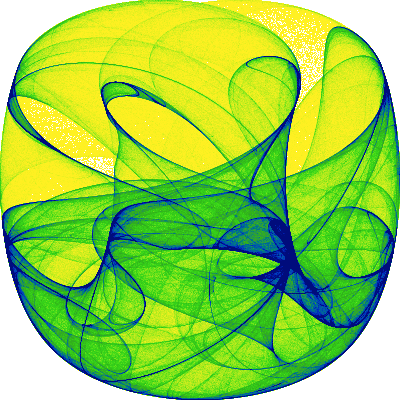

In [15]:
df = trajectory(svensson, -1.7,   1.8,   -1.9,   .4, 0.1, 0.1)
cvs = ds.Canvas(plot_width = 400, plot_height = 400)
agg = cvs.points(df, 'x', 'y')
img = tf.shade(agg, cmap = cmaps[0], how='linear', span = [0, n/40000])
img_map(img,"attractorSvensson2")

### Packages, version control

In [16]:
print("--"*25)
print("... numpy == ", np.__version__)
print("... matplotlib == ", mpl.__version__)
print("... pandas == ", pd.__version__)
print("... datashader == ", ds.__version__)
print("... numba == ", numba.__version__)
print("__"*25)

--------------------------------------------------
... numpy ==  1.14.0
... matplotlib ==  2.1.2
... pandas ==  0.22.0
... datashader ==  0.6.5
... numba ==  0.36.2
__________________________________________________
